In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import neighbors
from sklearn.metrics import accuracy_score

import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
iris = datasets.load_iris()
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
n_samples, n_features = iris.data.shape

print((n_samples, n_features))

(150, 4)


In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    X = iris.data[:, :2]  # только первые два признака (длина чашелистика и ширина чашелистика)
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    # создания координатных точек на плоскости
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')

    # Calculate accuracy
    y_pred = knn.predict(X)
    accuracy = accuracy_score(y, y_pred)
    pl.title(f'Accuracy: {accuracy:.2f}')


### Summary
Это функция, которая выполняет классификацию на основе алгоритма KNN. Она принимает следующие аргументы:
  X_train: Массив с обучающими данными, где каждая строка представляет собой признаковое описание одного объекта обучающей выборки.
  y_train: Массив с метками классов для обучающих данных, где каждая метка соответствует объекту из X_train.
  X_test: Массив с данными, которые нужно классифицировать.
  k: Параметр, который определяет количество ближайших соседей, учитываемых при классификации.

Создается пустой список y_pred, в который будут сохраняться предсказанные метки классов для данных из X_test.
Проходим по каждому объекту из X_test, для которого нужно выполнить классификацию.

Для текущего объекта x вычисляются расстояния между ним и всеми объектами из X_train. Это делается с помощью функции np.linalg.norm, которая вычисляет Евклидово расстояние между двумя точками в пространстве признаков.

Расстояния сортируются, и индексы точек из X_train упорядочиваются в порядке возрастания расстояния. Таким образом, в nearest_neighbors_indices будут индексы ближайших соседей для текущего объекта x.

Выбираются первые k индексов из nearest_neighbors_indices, что соответствует k ближайшим соседям для текущего объекта x.

Считается, какая метка класса чаще всего встречается среди ближайших соседей. Это делается с помощью функции np.bincount, которая подсчитывает количество вхождений каждой метки в массиве y_train для ближайших соседей, и argmax() используется для выбора наиболее часто встречающейся метки.

Предсказанная метка класса для текущего объекта x добавляется в список y_pred.

После завершения цикла, функция возвращает массив y_pred, содержащий предсказанные метки классов для всех объектов из X_test.

In [7]:
# Реализация алгоритма k-ближайших соседей
def k_nearest_neighbors(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        # Расчет расстояний между x и всеми точками в обучающей выборке
        distances = [np.linalg.norm(x - x_train) for x_train in X_train]
        # Сортировка индексов точек по расстояниям
        nearest_neighbors_indices = np.argsort(distances)
        # Получение k ближайших соседей
        k_nearest_indices = nearest_neighbors_indices[:k]
        # Метка класса, которая чаще всего встречается среди ближайших соседей
        most_common_label = np.bincount(y_train[k_nearest_indices]).argmax()
        y_pred.append(most_common_label)
    return np.array(y_pred)

In [8]:
def my_plot_iris_knn():
    X = iris.data[:, :2]  # только первые два признака (длина чашелистика и ширина чашелистика)
    y = iris.target  

    # Создание координатных точек на плоскости
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Применение k-ближайших соседей к данным
    k = 3
    Z = k_nearest_neighbors(X, y, X_grid, k)
    Z = Z.reshape(xx.shape)
    
    # Создание цветовых карт
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # Построение графика
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Построение точек обучающей выборки
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')
    
    # Расчет и вывод точности
    y_pred = k_nearest_neighbors(X, y, X, k)
    accuracy = (y_pred == y).mean()
    plt.title(f'Accuracy: {accuracy:.2f}')
    
    plt.show()

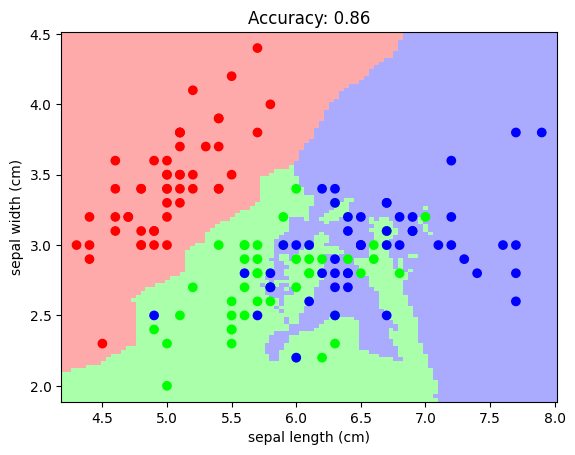

In [9]:
my_plot_iris_knn()

Сравним с готовой реализацией

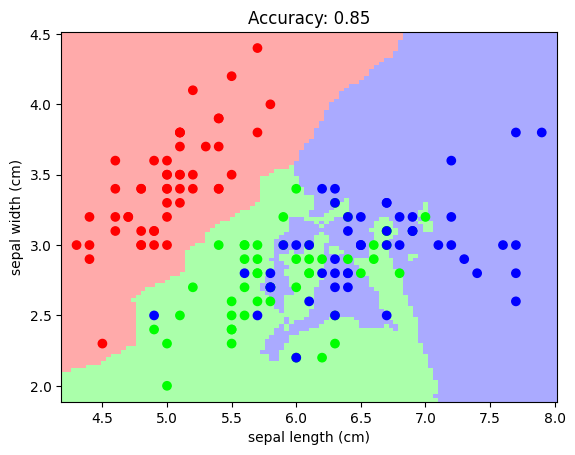

In [10]:
plot_iris_knn()

In [11]:
class KNN:
    def __init__(self, K=3):
        self.K = K
        
    def fit(self, x_train, y_train):
            self.X_train = x_train
            self.Y_train = y_train

    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.linalg.norm(self.X_train - X_test[i], axis=1)
            dist_sorted_indices = np.argsort(dist)[:self.K]
            
            # Считаем, сколько раз каждая метка встречается среди ближайших соседей
            unique_labels, neighbor_counts = np.unique(self.Y_train[dist_sorted_indices], return_counts=True)
            
            # Находим метку, которая встречается наибольшее количество раз
            predicted_label = unique_labels[np.argmax(neighbor_counts)]
            
            predictions.append(predicted_label)
        return np.array(predictions)

In [12]:
from sklearn.datasets import load_digits
mnist = load_digits()
print(mnist.data.shape)

(1797, 64)


In [13]:
X = mnist.data 
y = mnist.target

In [14]:
test_size = 0.25

num_samples = len(X)
num_test_samples = int(test_size * num_samples)
test_indices = np.random.choice(num_samples, num_test_samples, replace=False)

X_train = X[np.logical_not(np.isin(np.arange(num_samples), test_indices))]
y_train = y[np.logical_not(np.isin(np.arange(num_samples), test_indices))]
X_test = X[test_indices]
y_test = y[test_indices]

In [16]:
model = KNN(3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = (pred == y_test).mean()
print("Accuracy: "+str(acc))

Accuracy: 0.9955456570155902
